In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:
attrs = []
target = []
for xls in os.listdir('sample_data/'):
    data = pd.read_excel('sample_data/'+xls, header=None)

    output = data.iloc[-1,0]
    output = np.float32(output.split(':')[-1])
    data = data.iloc[0:-1]
    attrs.append(np.array(data))
    target.append(np.float32(output))

attrs = np.array(attrs)
target = np.array(target)

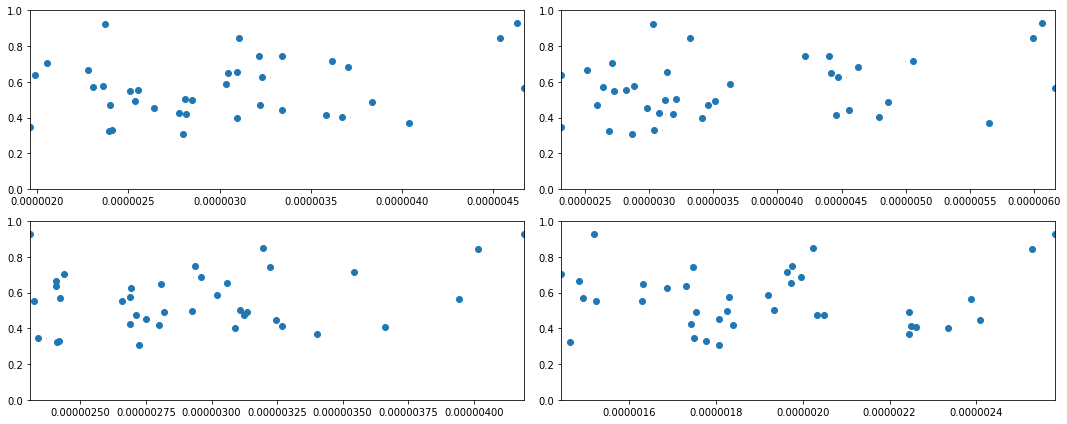

In [11]:
plt.figure(figsize=(15, 6))
for i in range(4):
    plt.subplot(2,2,i+1)
    x = np.mean(attrs[:,:,i], axis=1)
    plt.scatter(x, target)
    print()
    plt.axis([ min(x), max(x), 0, 1])
plt.tight_layout()

In [12]:
min = np.min(attrs, axis=None)
max = np.max(attrs, axis=None)

print('min = ', min)
print('max = ', max)

min =  1.3171675787247089e-09
max =  0.000854607292409486


In [10]:
scaled_attrs = (attrs-min)/(max-min) + 0.01

In [22]:
for xls in os.listdir('sample_data/'):
    data = pd.read_excel('sample_data/'+xls, header=None)

    output = data.iloc[-1,0]
    output = np.float32(output.split(':')[-1])
    data.iloc[-1,0] = 0
    data = (data-min)/(max-min) + 0.01
    data.iloc[-1,0] = output
    file_name = xls.split('.')[0]+'.csv'
    data.to_csv('preprocessed_data/' + file_name)